<a href="https://colab.research.google.com/github/fbaertl/Applied_Data_science_CAS_2022/blob/main/Fred_and_Nico_Notebook_CAS_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Module 6 - CIFAR10**

The goal of this notebook is to apply the knowledge acquired during the Bern Winter School on Machine Learning of 2023.


The data for the M6 project comes from the dataset CIFRA10 from the keras.io team:
https://keras.io/api/datasets/cifar10/

Each of the 10 classes of this dataset contains exacly 6000 samples(5000 for training and 1000 for test).

In [46]:
# Import the needed libraries

from __future__ import print_function

import os
import sys
import shutil
import tarfile

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras.preprocessing.image import ImageDataGenerator

%load_ext tensorboard
%matplotlib inline

##from keras.preprocessing.image import ImageDataGenerator

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [47]:
# Get CIFAR10 data from our source: https://keras.io/api/datasets/cifar10/

cifar10 = tf.keras.datasets.cifar10

# The default batch size of keras is 32
## and the number of classes for cifar10 is 10.
# This information is important for the next step.

In [105]:
# Setting the parameters for our model

batch_size = 32  # Forum discussions indicated batch_size of 32 is ideal for the CIFAR10 set 
num_classes = 10
epochs = 100 #(FURTHER VARIABLES TRIED 50)
data_augmentation = False # THIS INTEGRATED LOGIC HAS NOT BEEN USED BUT A SEPARATE MODEL WITH DATA  AUGMENTATION WAS USED INSTEAD (See below)

In [49]:
# Building the model:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Number of train samples:', x_train.shape[0])
print('Number of test samples:', x_test.shape[0])

print('Our x_train shape:', x_train.shape)
print('Our y_train shape:', y_train.shape)

Number of train samples: 50000
Number of test samples: 10000
Our x_train shape: (50000, 32, 32, 3)
Our y_train shape: (50000, 1)


In [50]:
# Normalizing the data by converting it to float.

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [106]:
# We define the model of CNN we want.

model = Sequential() # We add layers to the model one by one.

#First stage
## 32 kernels
#model.add(Conv2D(32, (3, 3), padding='same', USED INITIALLY BEFORE CHANGING FILTER
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:],
                 activation = 'relu'))
## 32 kernels bis
#model.add(Conv2D(32, (5, 5),  activation = 'relu')) USED INITIALLY BEFORE CHANGING FILTER
model.add(Conv2D(32, (5, 5),  activation = 'relu'))
## Max-pooling operation to reduce computational load NOT USED FOR INITIAL MODEL)
model.add(MaxPooling2D(pool_size=(2, 2)))
## Dropout of random 25% neurons (FURTHER VARIABLES TRIED 0, 0.1 , 0.25)
model.add(Dropout(0.20))

# Second stage
## 64 kernels
#model.add(Conv2D(64, (3, 3), padding='same', USED INITIALLY BEFORE CHANGING FILTER
model.add(Conv2D(64, (5, 5), padding='same',
                activation = 'relu'))
## 64 kernels bis
#model.add(Conv2D(64, (3, 3),  activation = 'relu')) USED INITIALLY BEFORE CHANGING FILTER
model.add(Conv2D(64, (5, 5), activation = 'relu'))
## Max-pooling operation (NOT USED FOR INITIAL MODEL)
model.add(MaxPooling2D(pool_size=(2, 2)))
## Dropout of 25% (FURTHER VARIABLES TRIED 0, 0.1 , 0.25)
model.add(Dropout(0.20))


# Final stage
## Converting the image to 1D
## (needed for the accuracy metric and to have compatible metrics)
model.add(Flatten())
## Adding 512 neurons
model.add(Dense(512, activation = 'relu'))
## Dropout of 50% (FURTHER VARIABLES TRIED 0, 0.3 , 0.4)
model.add(Dropout(0.5))
# Adding a softmax classifier (10 classes)
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [107]:
# Training the model

## Optimizer as RMSprop better than stochactic gradient descent (SGD)
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001) #(INITIALLY 0.001 but failed)
                                        #decay = 1e-6)

## Loss function (categorcial crossentropy instead of mse)
loss = 'categorical_crossentropy'

model.compile(optimizer = optimizer,
              loss = loss,
              metrics = 'accuracy')
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 conv2d_95 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_47 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_96 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 conv2d_97 (Conv2D)          (None, 10, 10, 64)        102464    
                                                     

In [108]:
# History of the model training

history = None # history logic not used
hist = model.fit(x_train, y_train, 
                 batch_size = batch_size,
                 epochs = epochs,
                 shuffle = True,
                 validation_data = (x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7879 - accuracy: 0.3411 - val_loss: 1.6769 - val_accuracy: 0.4048
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4454 - accuracy: 0.4751 - val_loss: 1.3275 - val_accuracy: 0.5215
Epoch 3/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2767 - accuracy: 0.5418 - val_loss: 1.2052 - val_accuracy: 0.5626
Epoch 4/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1599 - accuracy: 0.5860 - val_loss: 1.0349 - val_accuracy: 0.6331
Epoch 5/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0647 - accuracy: 0.6233 - val_loss: 1.0291 - val_accuracy: 0.6378
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9948 - accuracy: 0.6486 - val_loss: 0.9340 - val_accuracy: 0.6711
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9387 - accuracy: 0.6684 - val_loss: 0.9033 -

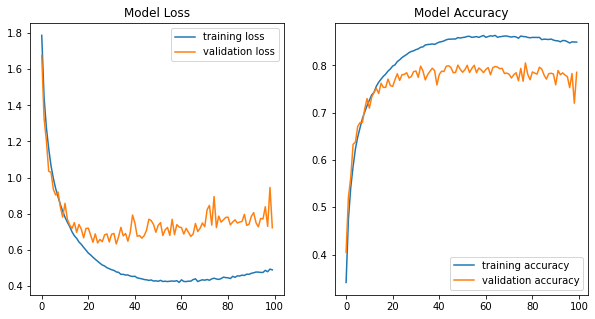

In [109]:
# Training and validation curves for evaluation

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].set_title('Model Loss')
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')

axs[1].set_title('Model Accuracy')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[791  10  13  36  15   4   5  12  87  27]
 [ 10 881   2  12   0   5   6   2  30  52]
 [ 77   4 566  99  91  64  43  29  19   8]
 [ 12   7  20 708  33 128  41  22  21   8]
 [ 11   0  25  69 763  37  30  47  16   2]
 [  7   0  11 189  31 712  14  32   3   1]
 [  7   1  19  78  19  24 837   3  10   2]
 [ 11   0   4  46  30  51   1 848   4   5]
 [ 31  12   1  10   1   1   3   2 926  13]
 [ 18  61   4  16   1   2   4  11  32 851]]


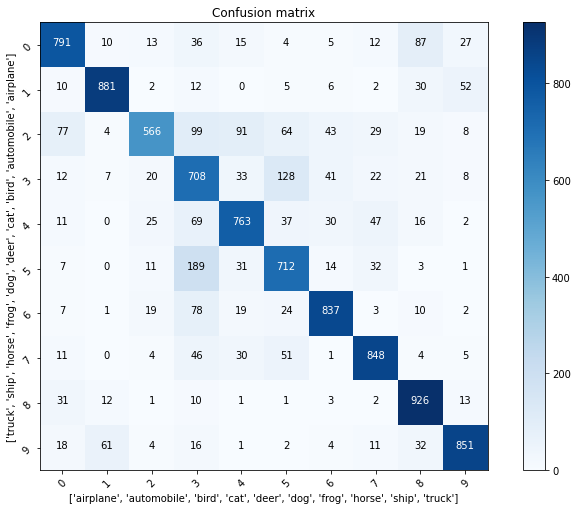

In [104]:
# Confusion matrix

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(model.predict(x_test), axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = model.predict(x_test)[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

plt.rcParams['figure.figsize'] = [10,7]

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes, rotation=45)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel(['truck', 'ship' , 'horse' , 'frog' , 'dog' , 'deer' , 'cat' , 'bird' , 'automobile' , 'airplane'])
  plt.xlabel(labels)
  plt.show()


#p_test = model.predict(x_test).argmax(axis=1)
#p_test = np.argmax(y_pred_classes)
cm = confusion_matrix(y_true, y_pred_classes)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Check the predictions

R = 6
C = 6
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" %
                      (labels[y_true[i]], labels[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [52]:
#Version with more layers  WITH DATA AUGMENTATION 
# We define the model of CNN we want.

# We define the model of CNN we want.

model2 = Sequential() # We add layers to the model one by one.

#First stage
## 32 kernels
model2.add(Conv2D(32, (3, 3), strides = 2, padding='same',
                 input_shape=x_train.shape[1:],
                 activation = 'relu'))
## 32 kernels bis
model2.add(Conv2D(32, (3, 3),  activation = 'relu'))
## Max-pooling operation to reduce computational load
model2.add(MaxPooling2D(pool_size=(2, 2)))
## Dropout of random 25% neurons
model2.add(Dropout(0.25))

# Second stage
## 64 kernels
model2.add(Conv2D(64, (3, 3), strides = 2, padding='same',
                activation = 'relu'))
## 64 kernels bis
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
## Max-pooling operation
model2.add(MaxPooling2D(pool_size=(2, 2)))
## Dropout of 25%
model2.add(Dropout(0.25))

# Third stage (not used as literatur indicated no addition accuracy gain with our dataset)
## 128 kernels
#model2.add(Conv2D(128, (3, 3), strides = 2, padding='same',
 #               activation = 'relu'))
## 128 kernels bis
#model2.add(Conv2D(128, (3, 3), activation = 'relu'))
## Max-pooling operation
#model2.add(MaxPooling2D(pool_size=(2, 2)))
## Dropout of 25%
#model2.add(Dropout(0.25))

# Final stage
## Converting the image to 1D
## (needed for the accuracy metric and to have compatible metrics)
model2.add(Flatten())
## Adding 512 neurons
model2.add(Dense(512, activation = 'relu'))
## Dropout of 50%
model2.add(Dropout(0.5))
# Adding a softmax classifier (10 classes)
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [59]:
model2.compile(optimizer = optimizer,
              loss = loss,
              metrics = 'accuracy')
model2.summary()

## DATA AUGMENTATION MODEL 

history2 = model2.fit_generator(it_train, epochs = epochs, shuffle = True,validation_data=(x_test, y_test), verbose=0)
## Loss function (categorcial crossentropy instead of mse)
loss = 'categorical_crossentropy'

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 conv2d_55 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 7, 7, 32)          0         
                                                                 
 conv2d_56 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 conv2d_57 (Conv2D)          (None, 2, 2, 64)          36928     
                                                     

<ipython-input-59-38cb5ea25f41>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(it_train, epochs = epochs, shuffle = True,validation_data=(x_test, y_test), verbose=0)


In [57]:
#Training Model 2

## Optimizer as RMSprop better than stochactic gradient descent (SGD)
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001)
                                        #decay = 1e-6)

## DATA AUGMENTATION STEPS (we used shift of image as well as flipping (horizontally)) 
#the issue is that we run the model as well as the image manipulation at the same time, thus takes long and is error phrone
#needs to be corrected for bigger dataset of final project
datagen = ImageDataGenerator(height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train)


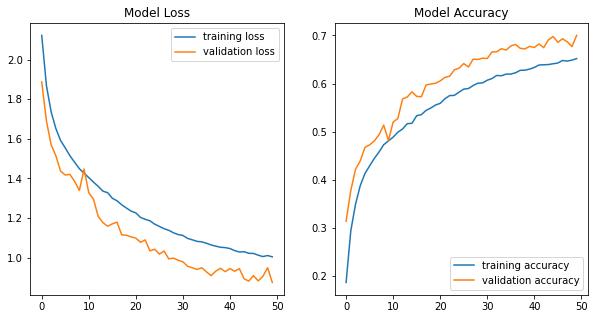

In [97]:
# Training and validation curves for evaluation of DATA AUGMENTATION MODEL 

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].set_title('Model Loss')
axs[0].plot(history2.epoch, history2.history['loss'])
axs[0].plot(history2.epoch, history2.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')

axs[1].set_title('Model Accuracy')
axs[1].plot(history2.epoch, history2.history['accuracy'])
axs[1].plot(history2.epoch, history2.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

In [ ]:
# Confusion matrix

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(model2.predict(x_test), axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = model2.predict(x_test)[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

plt.rcParams['figure.figsize'] = [10,7]

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes, rotation=45)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel(['truck', 'ship' , 'horse' , 'frog' , 'dog' , 'deer' , 'cat' , 'bird' , 'automobile' , 'airplane'])
  plt.xlabel(labels)
  plt.show()


#p_test = model2.predict(x_test).argmax(axis=1)
#p_test = np.argmax(y_pred_classes)
cm = confusion_matrix(y_true, y_pred_classes)
plot_confusion_matrix(cm, list(range(10)))